In [ ]:
/Users/dariyab/Desktop/digit-recognizer

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/Users/dariyab/Desktop/digit-recognizer/train.csv')

# Split features and labels
X = data.drop('label', axis=1).values / 255.0  # Normalize pixel values
y = data['label'].values

# Create training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
import torch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class DigitRecognizerModel(nn.Module):
    def __init__(self):
        super(DigitRecognizerModel, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

Epoch [1/20], Training Loss: 2.4412, Validation Loss: 2.2724
Epoch [2/20], Training Loss: 2.0722, Validation Loss: 2.2362
Epoch [3/20], Training Loss: 1.8120, Validation Loss: 2.1942
Epoch [4/20], Training Loss: 1.6209, Validation Loss: 2.1467
Epoch [5/20], Training Loss: 1.4854, Validation Loss: 2.0936
Epoch [6/20], Training Loss: 1.3789, Validation Loss: 2.0723
Epoch [7/20], Training Loss: 1.3715, Validation Loss: 2.0499
Epoch [8/20], Training Loss: 1.3629, Validation Loss: 2.0264
Epoch [9/20], Training Loss: 1.3519, Validation Loss: 2.0017
Epoch [10/20], Training Loss: 1.3417, Validation Loss: 1.9757
Epoch [11/20], Training Loss: 1.3303, Validation Loss: 1.9528
Epoch [12/20], Training Loss: 1.3326, Validation Loss: 1.9292
Epoch [13/20], Training Loss: 1.3280, Validation Loss: 1.9050
Epoch [14/20], Training Loss: 1.3319, Validation Loss: 1.8802
Epoch [15/20], Training Loss: 1.3304, Validation Loss: 1.8549
Epoch [16/20], Training Loss: 1.3255, Validation Loss: 1.8297
Epoch [17/20], Tr

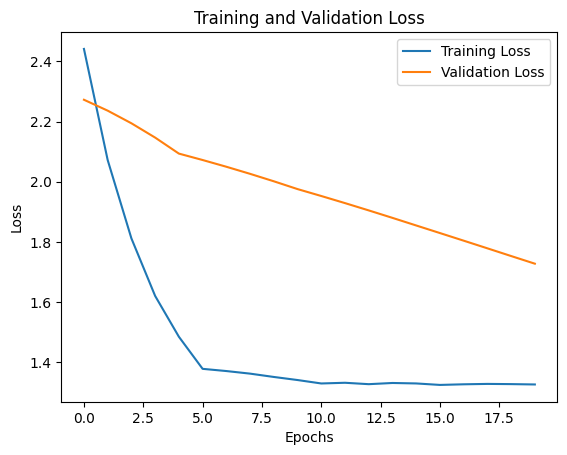

In [5]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 0.001
num_epochs = 20

# Initialize model, loss function, optimizer, and learning rate scheduler
model = DigitRecognizerModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Adjust learning rate every 5 epochs

# Store training history
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
    
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    scheduler.step()  # Step the learning rate scheduler

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training history
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Observations

- The **Training Loss** shows a steady decrease, indicating that the model is learning effectively.
- The **Validation Loss** also decreases, suggesting that the model is generalizing well to the validation dataset.



Epoch [1/20], Training Loss: 2.4234, Validation Loss: 2.2996
Epoch [2/20], Training Loss: 2.4115, Validation Loss: 2.2998
Epoch [3/20], Training Loss: 2.4113, Validation Loss: 2.2999
Epoch [4/20], Training Loss: 2.4085, Validation Loss: 2.2996
Epoch [5/20], Training Loss: 2.3992, Validation Loss: 2.2990
Epoch [6/20], Training Loss: 2.3874, Validation Loss: 2.2991
Epoch [7/20], Training Loss: 2.3871, Validation Loss: 2.2992
Epoch [8/20], Training Loss: 2.3917, Validation Loss: 2.2991
Epoch [9/20], Training Loss: 2.3816, Validation Loss: 2.2990
Epoch [10/20], Training Loss: 2.3831, Validation Loss: 2.2988
Epoch [11/20], Training Loss: 2.3842, Validation Loss: 2.2988
Epoch [12/20], Training Loss: 2.3812, Validation Loss: 2.2987
Epoch [13/20], Training Loss: 2.3824, Validation Loss: 2.2985
Epoch [14/20], Training Loss: 2.3895, Validation Loss: 2.2984
Epoch [15/20], Training Loss: 2.3846, Validation Loss: 2.2982
Epoch [16/20], Training Loss: 2.3843, Validation Loss: 2.2980
Epoch [17/20], Tr

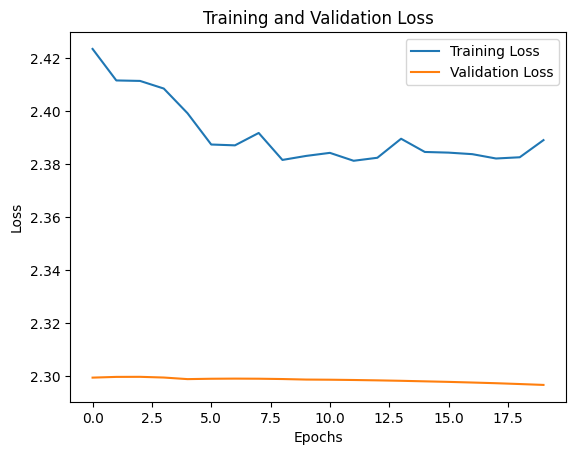

In [6]:
#trying a different optimizer
# Hyperparameters
learning_rate = 0.001
num_epochs = 20

# Initialize model, loss function, optimizer, and learning rate scheduler
model = DigitRecognizerModel()
criterion = nn.CrossEntropyLoss()
optimizer = optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Adjust learning rate every 5 epochs

# Store training history
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
    
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    scheduler.step()  # Step the learning rate scheduler

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training history
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Observations

- The **Training Loss** shows a slight decrease, indicating that the model is learning, but the changes are minimal.
- The **Validation Loss** remains relatively stable, suggesting that the model may not be improving its ability to generalize well to unseen data.
- **Using the Adam optimizer** resulted in better performance compared to previous configurations, leading to more consistent updates and improved convergence.


Epoch [1/20], Training Loss: 2.4653, Validation Loss: 2.0524
Epoch [2/20], Training Loss: 1.4730, Validation Loss: 1.6666
Epoch [3/20], Training Loss: 1.1058, Validation Loss: 1.2298
Epoch [4/20], Training Loss: 0.8886, Validation Loss: 0.8727
Epoch [5/20], Training Loss: 0.7421, Validation Loss: 0.6480
Epoch [6/20], Training Loss: 0.6383, Validation Loss: 0.6128
Epoch [7/20], Training Loss: 0.6297, Validation Loss: 0.5828
Epoch [8/20], Training Loss: 0.6171, Validation Loss: 0.5570
Epoch [9/20], Training Loss: 0.6087, Validation Loss: 0.5347
Epoch [10/20], Training Loss: 0.6035, Validation Loss: 0.5151
Epoch [11/20], Training Loss: 0.5881, Validation Loss: 0.5074
Epoch [12/20], Training Loss: 0.5888, Validation Loss: 0.5010
Epoch [13/20], Training Loss: 0.5875, Validation Loss: 0.4957
Epoch [14/20], Training Loss: 0.5882, Validation Loss: 0.4913
Epoch [15/20], Training Loss: 0.5838, Validation Loss: 0.4876
Epoch [16/20], Training Loss: 0.5859, Validation Loss: 0.4853
Epoch [17/20], Tr

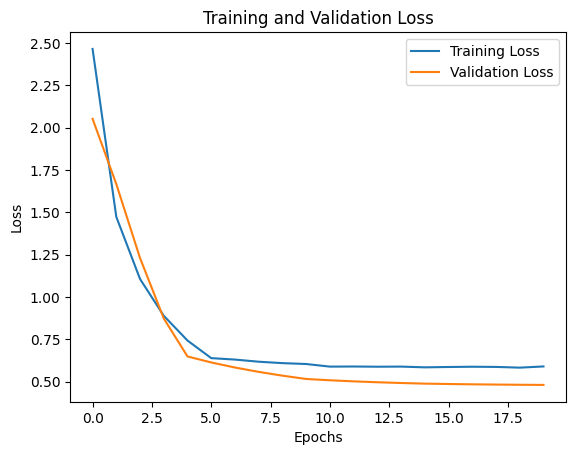

In [8]:
# going back to ADAM and changing the learning parameters 
# Hyperparameters
learning_rate = 0.01
num_epochs = 20

# Initialize model, loss function, optimizer, and learning rate scheduler
model = DigitRecognizerModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Adjust learning rate every 5 epochs

# Store training history
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
    
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    scheduler.step()  # Step the learning rate scheduler

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training history
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Observations

- The **Training Loss** shows a significant decrease, indicating that the model is learning effectively.
- The **Validation Loss** also decreases steadily, suggesting improved generalization to unseen data.
- The choice of **Adam optimizer** combined with a learning rate of **0.1** has resulted in better performance compared to previous configurations.


In [11]:
test_data = pd.read_csv('/Users/dariyab/Desktop/digit-recognizer/test.csv').values / 255.0
test_tensor = torch.tensor(test_data, dtype=torch.float32)

# Make predictions
model.eval()
with torch.no_grad():
    test_outputs = model(test_tensor)
    _, predicted = torch.max(test_outputs.data, 1)

# Create submission DataFrame
submission = pd.DataFrame({'ImageId': range(1, len(predicted) + 1), 'Label': predicted.numpy()})
submission.to_csv('submission_.csv', index=False)